# Beauty Dataset Analysis

This notebook analyzes the Beauty dataset structure and contents.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import pickle
import os

# Set style for better visualizations# Set style for better visualizations
plt.style.use('ggplot')  # Using a built-in style instead
sns.set_theme()  # This is the preferred way to set seaborn style
sns.set_palette('husl')

In [13]:
# Directory structure
!tree 'original/beauty'

original/beauty
├── item_texts
│   ├── brand.pkl
│   ├── brand.txt
│   ├── categories.pkl
│   ├── categories.txt
│   ├── description.pkl
│   └── title.pkl
├── meta.pkl
├── test_matrix.npz
├── train_matrix.npz
├── user_item_texts
│   ├── explain.pkl
│   ├── explain.txt
│   └── review.pkl
└── val_matrix.npz

3 directories, 13 files


## 1. Load and Analyze Interaction Matrices

In [4]:
# Load matrices
data_path = 'original/beauty/'
train_matrix = sparse.load_npz(os.path.join(data_path, 'train_matrix.npz'))
val_matrix = sparse.load_npz(os.path.join(data_path, 'val_matrix.npz'))
test_matrix = sparse.load_npz(os.path.join(data_path, 'test_matrix.npz'))

print(f'Train matrix shape: {train_matrix.shape}')
print(f'Validation matrix shape: {val_matrix.shape}')
print(f'Test matrix shape: {test_matrix.shape}')

Train matrix shape: (10553, 6086)
Validation matrix shape: (10553, 6086)
Test matrix shape: (10553, 6086)


In [5]:
# Analyze sparsity and basic statistics
def analyze_matrix(matrix, name):
    n_users, n_items = matrix.shape
    n_interactions = matrix.nnz
    sparsity = 100 * (1 - n_interactions / (n_users * n_items))
    
    print(f'\n{name} Matrix Statistics:')
    print(f'Number of users: {n_users}')
    print(f'Number of items: {n_items}')
    print(f'Number of interactions: {n_interactions}')
    print(f'Sparsity: {sparsity:.2f}%')
    
    # User interaction statistics
    user_interactions = np.array(matrix.sum(axis=1)).flatten()
    print(f'Average interactions per user: {user_interactions.mean():.2f}')
    print(f'Median interactions per user: {np.median(user_interactions):.2f}')
    
    return user_interactions

train_interactions = analyze_matrix(train_matrix, 'Train')
val_interactions = analyze_matrix(val_matrix, 'Validation')
test_interactions = analyze_matrix(test_matrix, 'Test')


Train Matrix Statistics:
Number of users: 10553
Number of items: 6086
Number of interactions: 70614
Sparsity: 99.89%
Average interactions per user: 6.69
Median interactions per user: 4.00

Validation Matrix Statistics:
Number of users: 10553
Number of items: 6086
Number of interactions: 11767
Sparsity: 99.98%
Average interactions per user: 1.12
Median interactions per user: 1.00

Test Matrix Statistics:
Number of users: 10553
Number of items: 6086
Number of interactions: 11767
Sparsity: 99.98%
Average interactions per user: 1.12
Median interactions per user: 1.00


In [10]:
# display a sub matrix of the train matrix
train_matrix.todense()[0:5, 0:5]

matrix([[1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32)

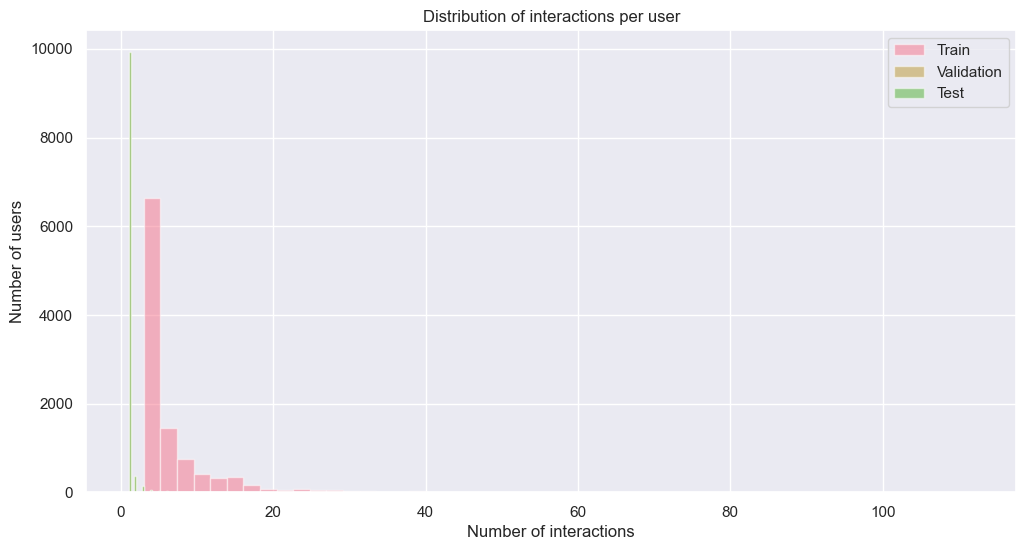

In [6]:
# Visualize distribution of interactions per user
plt.figure(figsize=(12, 6))
plt.hist(train_interactions, bins=50, alpha=0.5, label='Train')
plt.hist(val_interactions, bins=50, alpha=0.5, label='Validation')
plt.hist(test_interactions, bins=50, alpha=0.5, label='Test')
plt.xlabel('Number of interactions')
plt.ylabel('Number of users')
plt.title('Distribution of interactions per user')
plt.legend()
plt.show()

## 2. Analyze Item Texts

In [7]:
# List item text files
item_texts_path = os.path.join(data_path, 'item_texts')
print('Item text files:')
for file in os.listdir(item_texts_path):
    if not file.startswith('.'):
        print(f'- {file}')

Item text files:
- title.pkl
- categories.txt
- description.pkl
- brand.txt
- categories.pkl
- brand.pkl


In [11]:
# Display a subset of item texts
with open('original/beauty/item_texts/title.pkl', 'rb') as f:
    titles = pickle.load(f)
with open('original/beauty/item_texts/brand.pkl', 'rb') as f:
    brands = pickle.load(f)
with open('original/beauty/item_texts/description.pkl', 'rb') as f:
    descriptions = pickle.load(f)
with open('original/beauty/item_texts/categories.pkl', 'rb') as f:
    categories = pickle.load(f)

for idx in range(5):  # Show first 5 items
    print(f"\nItem {idx}:")
    print(f"Title: {titles[idx]}")
    print(f"Brand: {brands[idx]}")
    print(f"Categories: {categories[idx]}")
    print(f"Description: {descriptions[idx][:200]}...")  # Show first 200 chars of description


Item 0:
Title: ['The title of item_0 is:', ' BareMinerals Original Foundation Broad Spectrum SPF 15 8 g/0.28 Oz (Fair C10 8g/0.28 oz)']
Brand: ['The brand of item_0 is:', ' Bare Escentuals']
Categories: ['The categories of item_0 are:', ' Beauty, Makeup, Face, Foundation']
Description: ['The description of item_0 is:', ' bareMinerals Original Foundation Broad Spectrum SPF15 is an award-winning mineral foundation that gives you all the flawless coverage you want with a no-makeup look and feel that lasts up to eight hours. The creamy minerals diminish the appearance of imperfections without drying out skin. Naturally luminous finish.A groundbreaking formula, bareMinerals Original Foundation Broad Spectrum SPF15 is clinically proven to promote clearer, healthier-looking skin. It is formulated without parabens, binders, fillers, or synthetic chemicals. This foundation has been awarded the "Best Department/Specialty Stores Foundation" in the Glammy Award organized by Glamour Magazine from 

## 3. Analyze User-Item Texts

In [8]:
# List user-item text files
user_item_texts_path = os.path.join(data_path, 'user_item_texts')
print('User-item text files:')
for file in os.listdir(user_item_texts_path):
    if not file.startswith('.'):
        print(f'- {file}')

User-item text files:
- explain.pkl
- explain.txt
- review.pkl


In [12]:
# Load and examine user-item texts
with open('original/beauty/user_item_texts/review.pkl', 'rb') as f:
    reviews = pickle.load(f)
with open('original/beauty/user_item_texts/explain.pkl', 'rb') as f:
    explanations = pickle.load(f)

print("\n=== Example User-Item Interactions ===")
for idx in range(5):  # Show first 5 interactions
    print(f"\nInteraction {idx}:")
    print(f"Review: {reviews[idx][:200]}...")  # Show first 200 chars of review
    print(f"Explanation: {explanations[idx]}")


=== Example User-Item Interactions ===

Interaction 0:
Review: ['user_0 wrote the following review for item_0:', " I really dis-like the weight and feel of traditional foundation but I need coverage due to dark circles and uneven skin tone. I take full advantage of using the concealer brush and the kabuki brush for full coverage. I find that the shade I chose was a perfect match, it has good coverage, feels light and is less fussy to put on than regular foundation. I also like that it doesn't make me break out.I only gave it 4 stars because I find that it doesn't last all day. Then again, you reapply it like you would a powder so it's not a big deal.Bottom line is, for me it's good coverage and still manages to be lightweight and look natural. I'm happy with that."]...
Explanation: ['user_0 explains the reason for purchasing item_0:', " My go-to foundation\nI really dis-like the weight and feel of traditional foundation but I need coverage due to dark circles and uneven skin tone. I t